In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [2]:
data=pd.read_csv("F:\Gam3a lecs\Machine\games-classification-dataset.csv")
data.head()

URL          ID  \
0  https://apps.apple.com/us/app/heir-of-light/id...  1264483706   
1  https://apps.apple.com/us/app/endgame-eurasia/...   607705356   
2  https://apps.apple.com/us/app/free-solitaire/i...   627491527   
3  https://apps.apple.com/us/app/draft-trainer/id...   430252596   
4  https://apps.apple.com/us/app/rogue-knight-inf...  1115082819   

                           Name                       Subtitle  \
0                 HEIR OF LIGHT               Dark Fantasy RPG   
1               Endgame:Eurasia                            NaN   
2               Free Solitaire+                            NaN   
3                 Draft Trainer                            NaN   
4  Rogue Knight: Infested Lands  Tactical roguelike w/ stealth   

                                            Icon URL  User Rating Count  \
0  https://is3-ssl.mzstatic.com/image/thumb/Purpl...                982   
1  https://is4-ssl.mzstatic.com/image/thumb/Purpl...                 19   
2  https://is5-ssl.mzstatic.com/image/thumb/Purpl...                 14   
3  https://is1-ssl.mzstatic.com/image/thumb/Purpl...                 88   
4  https://is2-ssl.mzstatic.com/image/thumb/Purpl...                 13   

   Price                                   In-app Purchases  \
0   0.00  29.99, 19.99, 9.99, 29.99, 29.99, 8.99, 4.99, ...   
1   0.00                                                NaN   
2   0.00                                                NaN   
3   1.99                                                NaN   
4   3.99                                                NaN   

                                         Description           Developer  \
0  A Dark Fantasy, Collectible RPG\n\nDarkness ha...        GAMEVIL Inc.   
1  "This interactive experience is an exploration...  Auroch Digital Ltd   
2  Same Solitaire game with classic Solitaire run...     Chen Zhong Yuan   
3  ** Discounted for a limited time **\n\nEver wo...     GG Wizards, LLC   
4  Fight or sneak your way through hordes of mons...       Luis Regueira   

  Age Rating                               Languages       Size Primary Genre  \
0        12+  EN, FR, DE, JA, KO, ZH, ES, TH, ZH, VI  894489600         Games   
1        12+                                      EN  116407296         Games   
2         4+                                  EN, ZH   50647040         Games   
3         9+                                      EN   28120064         Games   
4        12+                                      EN   39915520         Games   

                                 Genres Original Release Date  \
0         Games, Role Playing, Strategy              6/3/2018   
1     Games, Simulation, Strategy, News            21/03/2013   
2  Games, Strategy, Entertainment, Card              4/4/2013   
3      Games, Utilities, Card, Strategy            26/05/2011   
4         Games, Role Playing, Strategy            19/05/2017   

  Current Version Release Date          Rate  
0                   31/07/2019  Intermediate  
1                   28/06/2017  Intermediate  
2                   21/04/2015          High  
3                   23/07/2019  Intermediate  
4                     6/2/2019          High

In [3]:
X=data.drop('Rate',axis=1)
y=data['Rate']

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=2)

In [5]:
train_data=pd.concat([X_train,y_train],axis='columns')
test_data=pd.concat([X_test,y_test],axis='columns')


In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4171 entries, 253 to 2575
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   URL                           4171 non-null   object 
 1   ID                            4171 non-null   int64  
 2   Name                          4171 non-null   object 
 3   Subtitle                      1167 non-null   object 
 4   Icon URL                      4171 non-null   object 
 5   User Rating Count             4171 non-null   int64  
 6   Price                         4171 non-null   float64
 7   In-app Purchases              2535 non-null   object 
 8   Description                   4171 non-null   object 
 9   Developer                     4171 non-null   object 
 10  Age Rating                    4171 non-null   object 
 11  Languages                     4161 non-null   object 
 12  Size                          4171 non-null   int64  
 13  P

In [7]:
train_data.shape

(4171, 18)

In [8]:
train_data.describe()

ID  User Rating Count        Price          Size
count  4.171000e+03       4.171000e+03  4171.000000  4.171000e+03
mean   8.661515e+08       4.145890e+03     0.602407  1.381858e+08
std    2.945126e+08       5.543394e+04     2.730678  2.554433e+08
min    2.849214e+08       5.000000e+00     0.000000  2.158400e+05
25%    5.952646e+08       1.300000e+01     0.000000  2.761677e+07
50%    9.177783e+08       5.000000e+01     0.000000  6.700851e+07
75%    1.112485e+09       3.380000e+02     0.000000  1.591173e+08
max    1.341837e+09       3.032734e+06   139.990000  4.005591e+09

In [9]:
train_data.isnull().sum().sort_values(ascending=False)

Subtitle                        3004
In-app Purchases                1636
Languages                         10
URL                                0
Age Rating                         0
Current Version Release Date       0
Original Release Date              0
Genres                             0
Primary Genre                      0
Size                               0
Developer                          0
ID                                 0
Description                        0
Price                              0
User Rating Count                  0
Icon URL                           0
Name                               0
Rate                               0
dtype: int64

In [10]:
train_data.drop(['Subtitle','In-app Purchases'],axis=1,inplace=True)

In [11]:
train_data['Languages'].fillna(train_data['Languages'].mode()[0], inplace=True)

In [12]:
train_data.duplicated().sum()
#remove them

25

In [13]:
train_data.drop_duplicates(inplace=True)

# EDA

<AxesSubplot:xlabel='Rate', ylabel='count'>

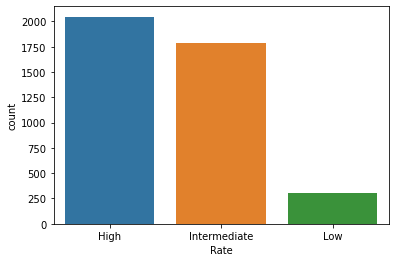

In [14]:
sns.countplot(x=train_data['Rate'])

data is unBalnced

<AxesSubplot:xlabel='Age Rating', ylabel='count'>

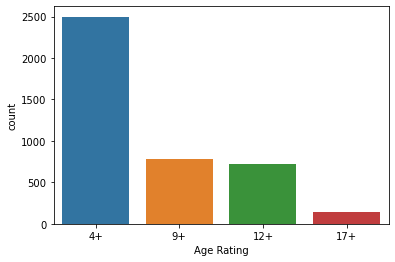

In [15]:
sns.countplot(x=train_data['Age Rating'])

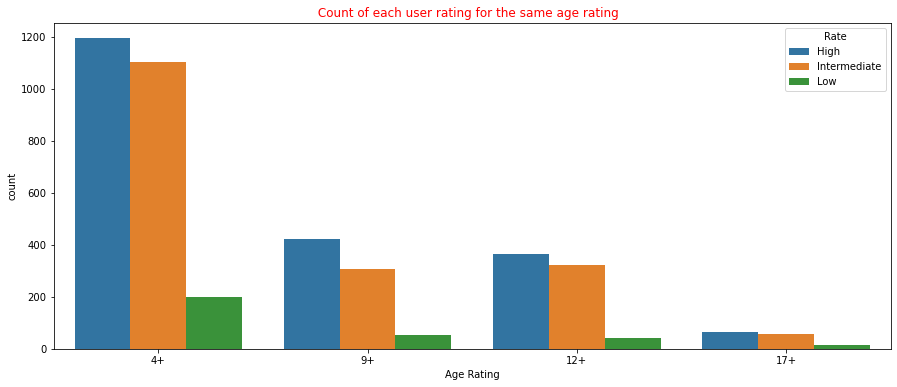

In [16]:
plt.figure(figsize=(15,6))
ax = sns.countplot(x ='Age Rating',hue='Rate', data = train_data)
plt.title(" Count of each user rating for the same age rating   ",color="red");

disturbation is the same in all Age ratings >>> Not affected

In [17]:
Q1 = train_data['Size'].quantile(0.25)
Q3 = train_data['Size'].quantile(0.75)

x1=train_data[train_data['Size']<Q1]
x2=train_data[(train_data['Size']>Q1) & (train_data['Size']<Q3)]
x3=train_data[train_data['Size']>Q3]


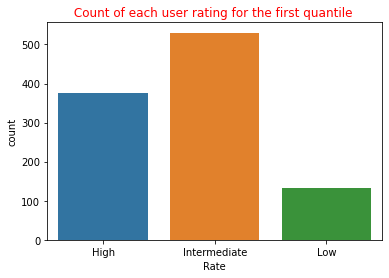

In [18]:
sns.countplot(x=x1['Rate'])
plt.title(" Count of each user rating for the first quantile  ",color="red");

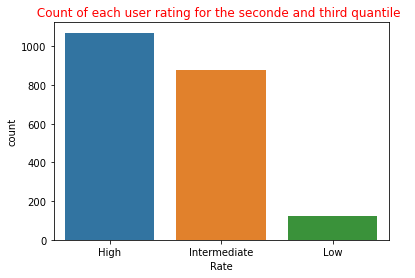

In [19]:
sns.countplot(x=x2['Rate'])
plt.title(" Count of each user rating for the seconde and third quantile  ",color="red");

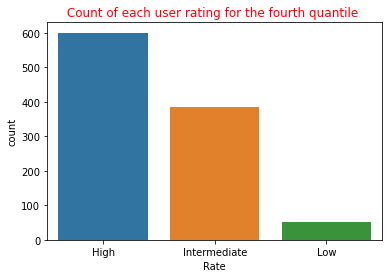

In [20]:
sns.countplot(x=x3['Rate'])
plt.title(" Count of each user rating for the fourth quantile  ",color="red");

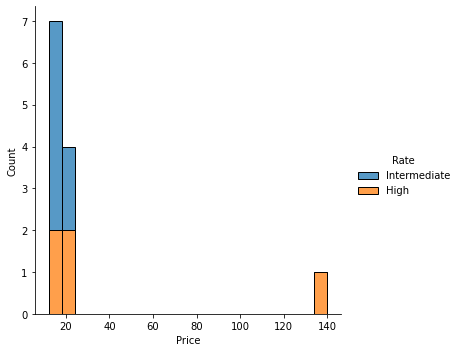

In [21]:
u=train_data[train_data['Price']>10]
sns.displot(data=u, x="Price", hue="Rate", multiple="stack")

In [22]:
len(u)

12

If price increasing does it affect to rating>>>>conclusion inc price inc Average directly porpointal

low no of row doesn't affect

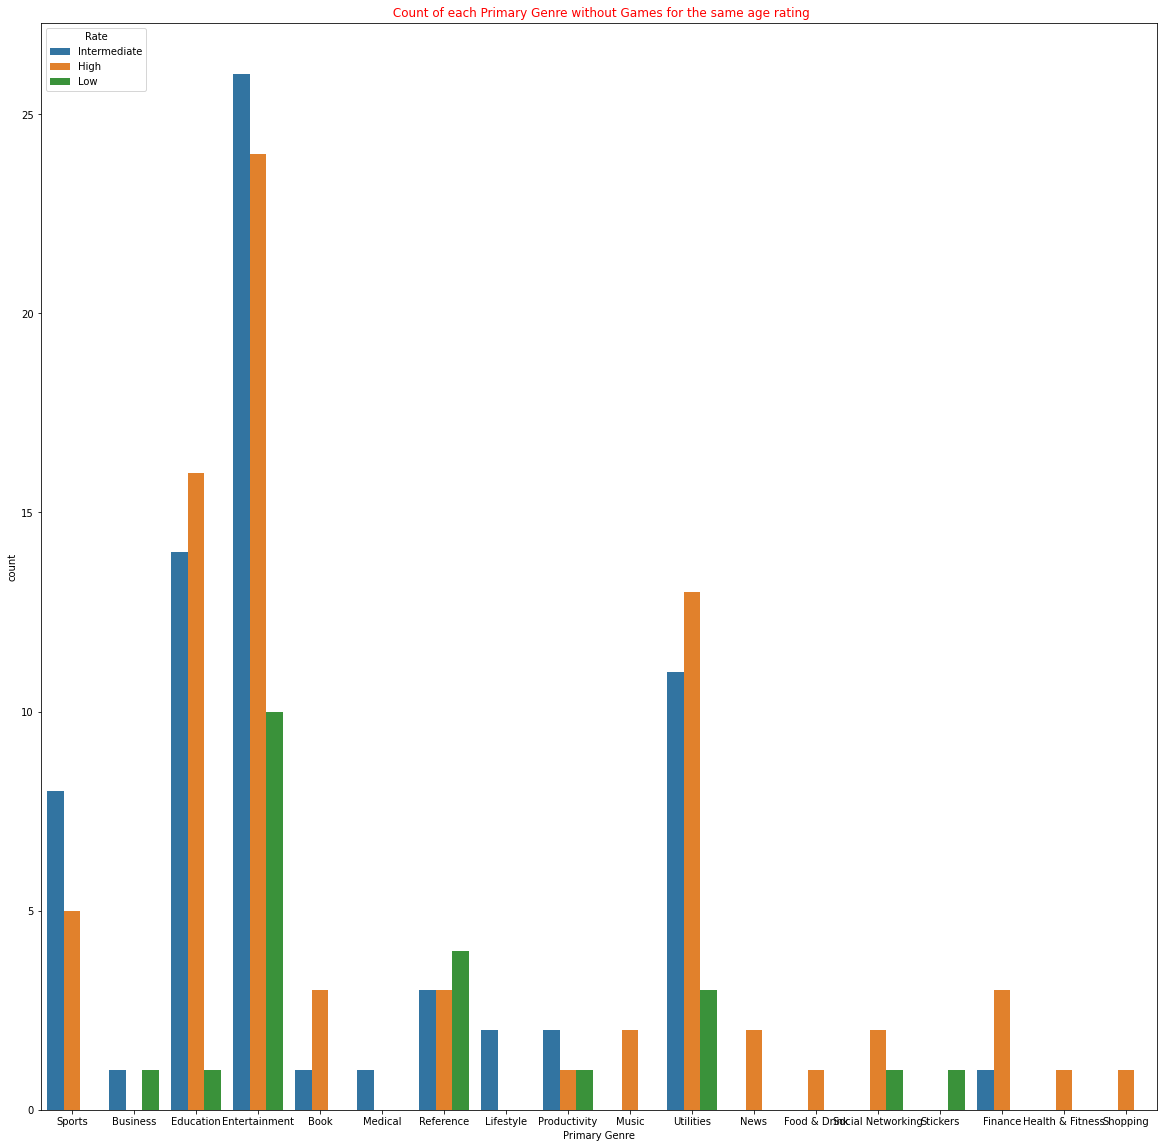

In [23]:
plt.figure(figsize=(20,20))
u=train_data.loc[(train_data["Primary Genre"]!='Games')]

ax = sns.countplot(x ='Primary Genre',hue='Rate', data = u)
plt.title(" Count of each Primary Genre without Games for the same age rating",color="red");

Outliers Detected

In [24]:
len(u)

169

In [25]:
# data['Original Release Date']=pd.to_datetime(data["Original Release Date"], dayfirst=True)
# data['Current Version Release Date']=pd.to_datetime(data["Current Version Release Date"], dayfirst=True)

# data['Original Release Year']=data['Original Release Date'].dt.year
# data['Current Version Release Year']=data['Current Version Release Date'].dt.year


# data.drop(['Original Release Date','Current Version Release Date'],axis=1,inplace=True)
#  plt.figure(figsize=(15,10))
# ax = sns.countplot(x ='Original Release Year',hue='Average User Rating', data = data)
# plt.title(" User Rating for each year   ",color="red");

In [14]:
train_data['Original Release Date'] = pd.to_datetime(train_data['Original Release Date'],dayfirst=True).astype('datetime64[ns]').astype('int64')
train_data['Current Version Release Date'] = pd.to_datetime(train_data['Current Version Release Date'],dayfirst=True).astype('datetime64[ns]').astype('int64')

C:\Users\JSTOCK~1\AppData\Local\Temp/ipykernel_5948/3607878080.py:1: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  train_data['Original Release Date'] = pd.to_datetime(train_data['Original Release Date'],dayfirst=True).astype('datetime64[ns]').astype('int64')
C:\Users\JSTOCK~1\AppData\Local\Temp/ipykernel_5948/3607878080.py:2: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  train_data['Current Version Release Date'] = pd.to_datetime(train_data['Current Version Release Date'],dayfirst=True).astype('datetime64[ns]').astype('int64')


In [15]:
train_data['Age Rating']=train_data['Age Rating'].str.replace('+', '')
train_data['Age Rating']=train_data['Age Rating'].apply(pd.to_numeric)
train_data['Age Rating']

C:\Users\JSTOCK~1\AppData\Local\Temp/ipykernel_5948/2599777923.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  train_data['Age Rating']=train_data['Age Rating'].str.replace('+', '')


253      4
2592     9
1605     4
4661     4
2        4
        ..
3335     4
1099     4
2514     4
3606    12
2575     4
Name: Age Rating, Length: 4146, dtype: int64

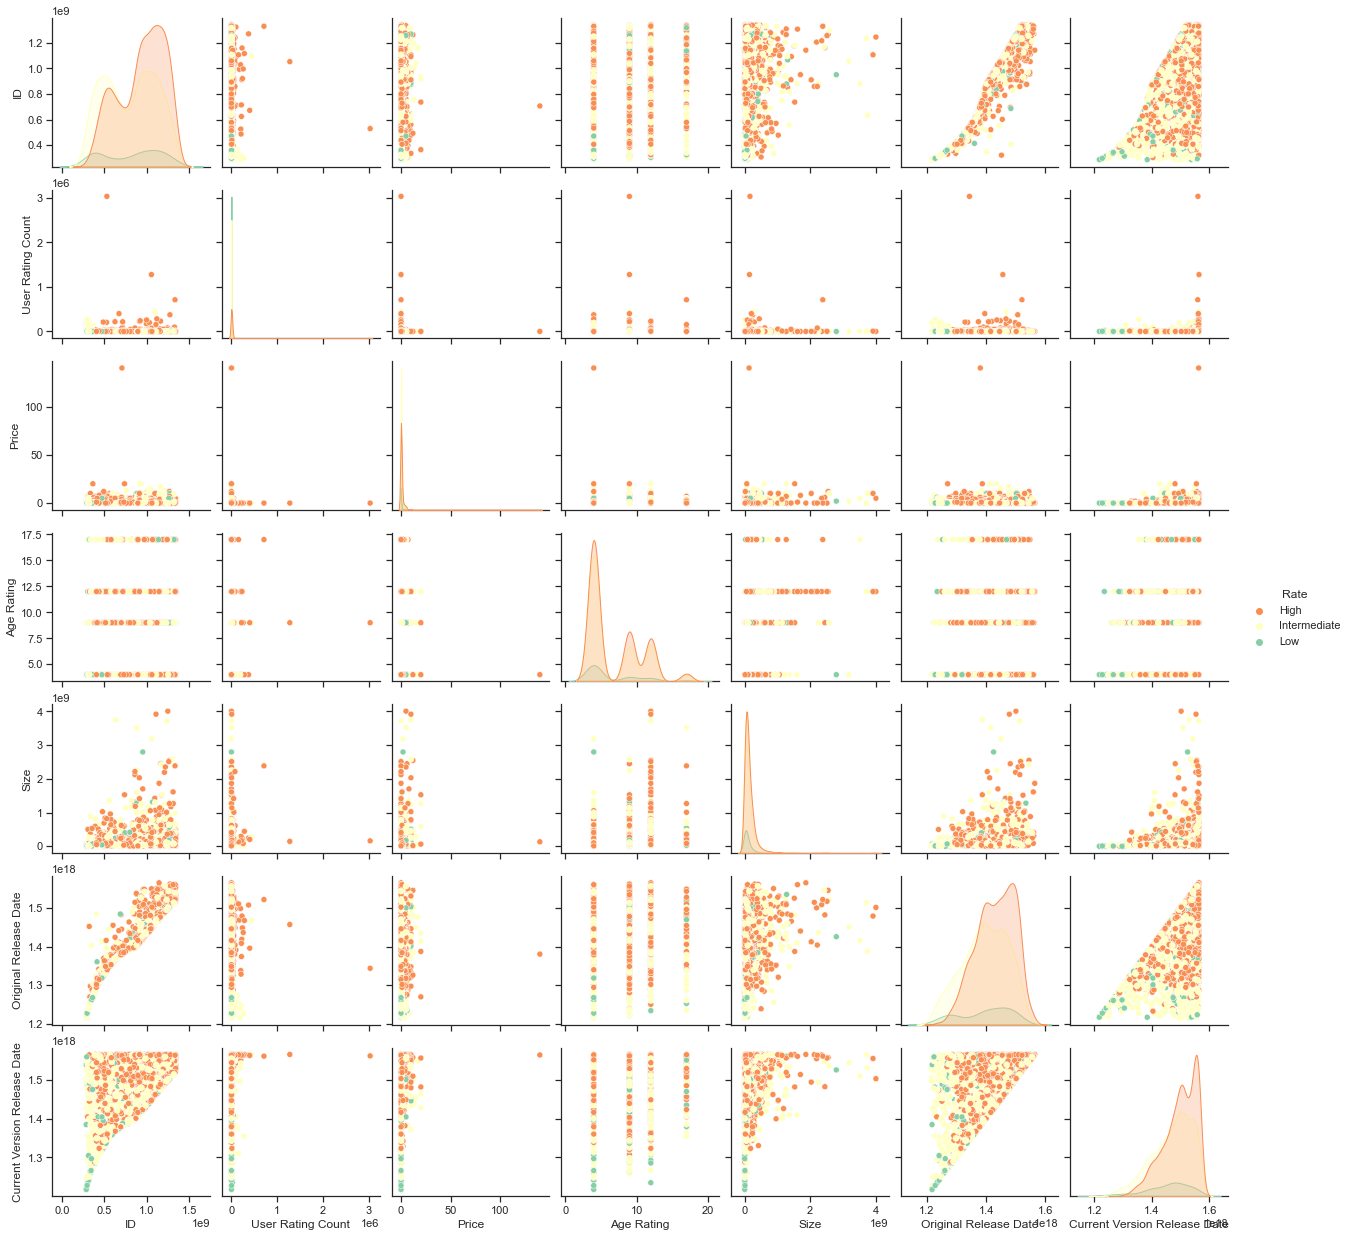

In [28]:
sns.set_theme(style="ticks")
sns.pairplot(train_data, hue="Rate",palette="Spectral")

In [16]:
train_data['Developer'].value_counts()

Tapps Tecnologia da Informa\xe7\xe3o Ltda.    78
Detention Apps                                27
HexWar Games Ltd                              22
EASY Inc.                                     19
Qumaron                                       19
                                              ..
Etcetera Edutainment, Inc.                     1
Laylo Inc.                                     1
Jabatoba AB                                    1
Superbrightly Studio LLC                       1
Helen Cheng                                    1
Name: Developer, Length: 2607, dtype: int64

In [17]:
train_data['Name'].is_unique

True

In [18]:
train_data['ID'].is_unique

True

In [19]:
train_data['URL'].is_unique

True

In [20]:
train_data['Icon URL'].is_unique

True

In [21]:
train_data['Primary']=train_data['Primary Genre']

In [35]:
from scipy.stats import chi2_contingency

In [36]:
# Create a contingency table of observed frequencies
contingency = pd.crosstab(train_data['Primary'], train_data['Rate'])
# Calculate expected frequencies assuming independence
chi2, p, dof, expected = chi2_contingency(contingency)
# Print results
print('p-value: %f' % p)

p-value: 0.002017


In [37]:
# Create a contingency table of observed frequencies
contingency = pd.crosstab(train_data['Developer'], train_data['Rate'])
# Calculate expected frequencies assuming independence
chi2, p, dof, expected = chi2_contingency(contingency)
# Print results
print('p-value: %f' % p)

p-value: 0.000000


In [38]:
# Create a contingency table of observed frequencies
contingency = pd.crosstab(train_data['Languages'], train_data['Rate'])
# Calculate expected frequencies assuming independence
chi2, p, dof, expected = chi2_contingency(contingency)
# Print results
print('p-value: %f' % p)

p-value: 0.352535


In [39]:
# Create a contingency table of observed frequencies
contingency = pd.crosstab(train_data['Genres'], train_data['Rate'])
# Calculate expected frequencies assuming independence
chi2, p, dof, expected = chi2_contingency(contingency)
# Print results
print('p-value: %f' % p)

p-value: 0.013257


In [22]:
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows 
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
train_data['Rate']= label_encoder.fit_transform(train_data['Rate'])

In [23]:
train_data['Rate']

253     0
2592    0
1605    0
4661    0
2       0
       ..
3335    1
1099    0
2514    0
3606    0
2575    0
Name: Rate, Length: 4146, dtype: int32

<AxesSubplot:>

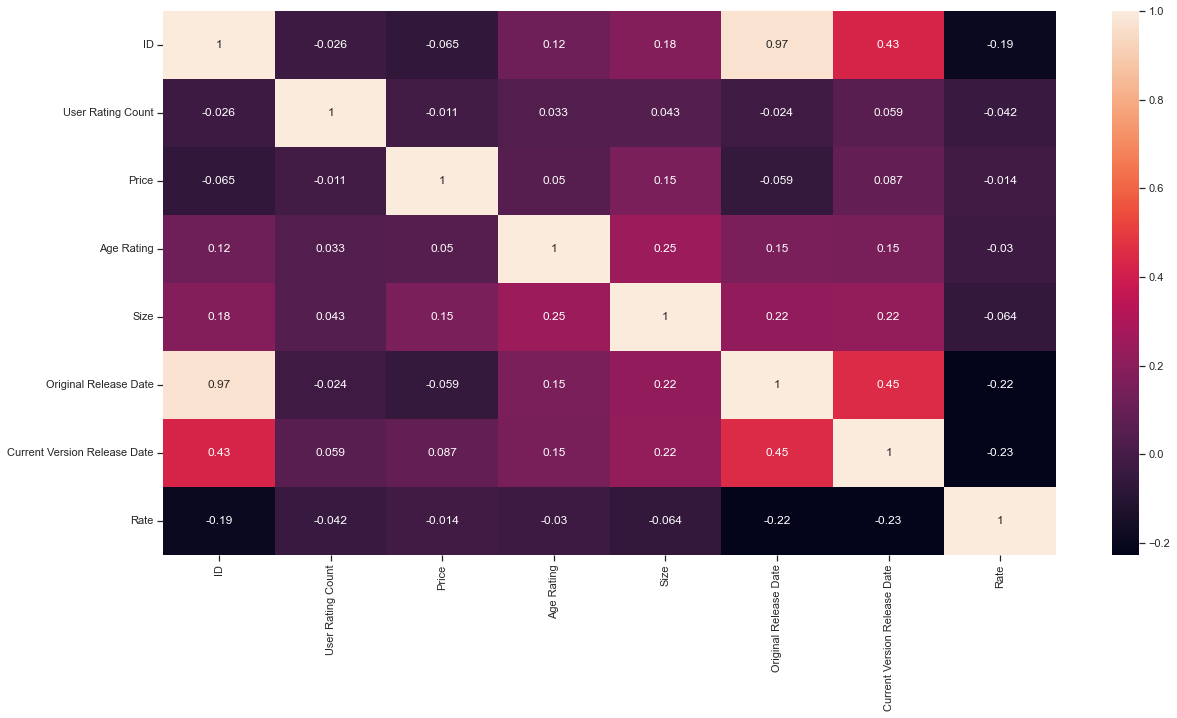

In [42]:
plt.figure(figsize=(20,10))
sns.heatmap(train_data.corr(),annot=True)

In [24]:
train_data.drop(['URL','Icon URL','Name','ID','Description','Languages','Primary','User Rating Count','Price','Age Rating','Size'],axis=1,inplace=True)
#data.drop(['URL','Icon URL','Name','ID','Description','Languages'],axis=1,inplace=True)

In [25]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4146 entries, 253 to 2575
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Developer                     4146 non-null   object
 1   Primary Genre                 4146 non-null   object
 2   Genres                        4146 non-null   object
 3   Original Release Date         4146 non-null   int64 
 4   Current Version Release Date  4146 non-null   int64 
 5   Rate                          4146 non-null   int32 
dtypes: int32(1), int64(2), object(3)
memory usage: 210.5+ KB


In [26]:
def one_hot_encoding(data,to_be_hot_encoded):
    list_all_unique = []
    # Get New Columns Names.
    for feature in to_be_hot_encoded:
        unique_values = set()
        for i in range(0, len(data)):
            cell = data[feature].iloc[i]  # Equivalent to X[feature][i]
            if not pd.isnull(cell):
                valuesList = cell.split(',')  # ex -> valuesList = [En, Fr, Da, SP]
                for value in valuesList:
                    unique_values.add(value)

        for item in unique_values:
            list_all_unique.append(item)

    returned=update_with_new_columns(data,list_all_unique,to_be_hot_encoded)
    return returned,list_all_unique

In [27]:
def update_with_new_columns(data,list_all_unique,to_be_hot_encoded):
    # Add New Columns.
    updated_data = data
    updated_data = updated_data.reset_index(drop=True)
    for value in list_all_unique:
        new_column_arr = np.zeros(len(data))
        new_column_df = pd.Series(new_column_arr, name=value)
        updated_data = pd.concat([updated_data, new_column_df], axis=1)

    # Remove Old Columns
    for feature in to_be_hot_encoded:
        updated_data.drop(feature, axis=1, inplace=True)

    # Add Ones in the right columns.
    for feature in to_be_hot_encoded:
        for i in range(0, len(data)):
            cell = data[feature].iloc[i]
            if not pd.isnull(cell):
                valuesList = cell.split(',')
                for value in valuesList:
                    if value in updated_data: # Check if 'value' is seen in training operation.     #else: ignore it.
                        value_i = updated_data.columns.get_loc(value)
                        updated_data.iloc[i, value_i] = 1

    # Update.
    return updated_data

In [28]:
traain,list_unquie_train=one_hot_encoding(train_data,['Genres','Developer','Primary Genre'])

In [29]:
from sklearn.ensemble import IsolationForest

model_IF = IsolationForest(contamination=float(0.1))
model_IF.fit(traain)

D:\anaconda\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


IsolationForest(contamination=0.1)

In [30]:
traain['anomaly'] = model_IF.predict(traain)
data_without_outliers=traain.loc[traain['anomaly']!=-1]

In [31]:
X_train=traain.drop(['Rate','anomaly'],axis=1)
y_train=traain['Rate']

In [32]:
y_train=traain['Rate']

In [33]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
X_train_std = sc.fit_transform(X_train)

In [34]:
test_data.drop(['Subtitle','In-app Purchases','URL','Icon URL','Name','ID','Description','Languages','User Rating Count','Price','Age Rating','Size'],axis=1,inplace=True)


In [35]:
test_data['Original Release Date'] = pd.to_datetime(test_data['Original Release Date'],dayfirst=True).astype('datetime64[ns]').astype('int64')
test_data['Current Version Release Date'] = pd.to_datetime(test_data['Current Version Release Date'],dayfirst=True).astype('datetime64[ns]').astype('int64')

C:\Users\JSTOCK~1\AppData\Local\Temp/ipykernel_5948/3821080522.py:1: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  test_data['Original Release Date'] = pd.to_datetime(test_data['Original Release Date'],dayfirst=True).astype('datetime64[ns]').astype('int64')
C:\Users\JSTOCK~1\AppData\Local\Temp/ipykernel_5948/3821080522.py:2: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  test_data['Current Version Release Date'] = pd.to_datetime(test_data['Current Version Release Date'],dayfirst=True).astype('datetime64[ns]').astype('int64')


In [36]:
test_data.isnull().sum().sort_values(ascending=False)

Developer                       0
Primary Genre                   0
Genres                          0
Original Release Date           0
Current Version Release Date    0
Rate                            0
dtype: int64

In [37]:
teest=update_with_new_columns(test_data,list_unquie_train,['Genres','Developer','Primary Genre'])

In [38]:
X_test=teest.drop(['Rate'],axis=1)
y_test=teest['Rate']

In [39]:
X_test_std = sc.transform(X_test)

In [40]:
y_test= label_encoder.transform(y_test)

In [41]:
X_train_std.shape

(4146, 2722)

In [42]:
X_test_std.shape

(1043, 2722)

In [43]:
from imblearn.over_sampling import SMOTE

# X: feature matrix, y: target vector
smote = SMOTE()
X_train_std, y_train = smote.fit_resample(X_train_std, y_train)

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from xgboost import XGBClassifier


## Grid search

In [49]:
from sklearn.model_selection import GridSearchCV

def grid_search (estimator, id ,param_grid):

    g_search = GridSearchCV(
    estimator= estimator, 
    param_grid= param_grid,
    scoring = 'accuracy',
    cv=5
    )

    g_search.fit(X_train_std, y_train)

    print(f"{id}  BESt ESTIMATOR: {g_search.best_estimator_}")
    print(f"{id}  BEST PARAMETERS: {g_search.best_params_}")
    print(f"{id}  BEST SCORE: {g_search.best_score_}")


## $\text{Logistic Regression}$

In [84]:
from sklearn.linear_model import LogisticRegression

logreg=LogisticRegression(max_iter=1000)

param_grid ={"C":[1,5,10], "penalty":["l1","l2"]}

grid_search(logreg, "Logistic regression", param_grid)


D:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "D:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solver lbfgs supports only 'l2' or 'none' pen

Logistic regression  BESt ESTIMATOR: LogisticRegression(C=10, max_iter=1000)
Logistic regression  BEST PARAMETERS: {'C': 10, 'penalty': 'l2'}
Logistic regression  BEST SCORE: 0.7579075842405805


## $\text{Decision Tree}$

In [92]:
from sklearn.tree import DecisionTreeClassifier

param_grid = {
              'ccp_alpha': [0.1, .01, .001,1],
              'max_depth' : [5,8,10,15],
              'criterion' :['gini', 'entropy']
             }
tree_clas = DecisionTreeClassifier(random_state=1024)

grid_search(tree_clas, "Decision Tree", param_grid)



Decision Tree  BESt ESTIMATOR: DecisionTreeClassifier(ccp_alpha=0.001, criterion='entropy', max_depth=15,
                       random_state=1024)
Decision Tree  BEST PARAMETERS: {'ccp_alpha': 0.001, 'criterion': 'entropy', 'max_depth': 15}
Decision Tree  BEST SCORE: 0.51352455208408


## $\text{Random Forest}$

In [94]:
from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier(random_state=42)

param_grid = { 
    'n_estimators': [700],
    'max_depth' : [5,10,15],
    'criterion' :['gini', 'entropy']
}

grid_search(rfc, "Random forest", param_grid)

Random forest  BESt ESTIMATOR: RandomForestClassifier(criterion='entropy', max_depth=15, n_estimators=700,
                       random_state=42)
Random forest  BEST PARAMETERS: {'criterion': 'entropy', 'max_depth': 15, 'n_estimators': 700}
Random forest  BEST SCORE: 0.6612985778719315


## $\text{Naive Bayes}$

In [52]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}

grid_search(model, "Naive", params_NB)

Naive  BESt ESTIMATOR: GaussianNB(var_smoothing=6.579332246575683e-05)
Naive  BEST PARAMETERS: {'var_smoothing': 6.579332246575683e-05}
Naive  BEST SCORE: 0.5773928890941865


## $\text{SVM}$

In [136]:
from sklearn import svm
clf = svm.SVC(kernel='linear')
clf.fit(X_train_std,y_train)
y_pred = clf.predict(X_test_std)

In [105]:
print("Accuracy of Test "+str(accuracy_score(y_test, y_pred)))
print('\n')
print(classification_report(y_test, y_pred))

Accuracy of Train: 0.576222435282838


              precision    recall  f1-score   support

           0       0.62      0.71      0.66       497
           1       0.59      0.49      0.54       467
           2       0.23      0.24      0.23        79

    accuracy                           0.58      1043
   macro avg       0.48      0.48      0.48      1043
weighted avg       0.58      0.58      0.57      1043



## $\text{Best Models}$

# Logistic

In [50]:
logreg=LogisticRegression(C=10,penalty='l2',max_iter=1500)

logreg.fit(X_train_std,y_train)

y_pred_test = logreg.predict(X_test_std)

In [51]:
from sklearn.metrics import classification_report,accuracy_score
print("Accuracy of Test: "+str(accuracy_score(y_test, y_pred_test)))
print('\n')
print(classification_report(y_test, y_pred_test))

Accuracy of Test: 0.5877277085330777


              precision    recall  f1-score   support

           0       0.62      0.72      0.66       497
           1       0.60      0.52      0.56       467
           2       0.21      0.18      0.19        79

    accuracy                           0.59      1043
   macro avg       0.48      0.47      0.47      1043
weighted avg       0.58      0.59      0.58      1043



# XGB

In [98]:
from xgboost import XGBClassifier

xgb=XGBClassifier(n_estimators=800)
xgb.fit(X_train_std,y_train)

y_pred_test = xgb.predict(X_test_std)

In [99]:
from sklearn.metrics import classification_report,accuracy_score
print("Accuracy of Test: "+str(accuracy_score(y_test, y_pred_test)))
print('\n')
print(classification_report(y_test, y_pred_test))

Accuracy of Test: 0.5934803451581975


              precision    recall  f1-score   support

           0       0.62      0.71      0.66       497
           1       0.57      0.55      0.56       467
           2       0.40      0.13      0.19        79

    accuracy                           0.59      1043
   macro avg       0.53      0.46      0.47      1043
weighted avg       0.58      0.59      0.58      1043



# Stacked 

In [45]:
from sklearn.ensemble import StackingClassifier
estimators = [
     ('svm', svm.SVC(kernel='linear')),
     ('XGB', XGBClassifier(n_estimators=800))]
clf = StackingClassifier(
     estimators=estimators, final_estimator=LogisticRegression(C=10,penalty='l2',max_iter=1000))
clf.fit(X_train_std, y_train)


StackingClassifier(estimators=[('svm', SVC(kernel='linear')),
                               ('XGB',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric=None,
                                              feature_types=None, gamma=None,
                                              gpu_id=None, grow_policy=None,
                                              importance_type=None,
                                              interacti...straints=None,
                                              learning_rate=None, max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None,
                                              max_depth=None, max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              n_estimators=800, n_jobs=None,
                                              num_parallel_tree=None,
                                              predictor=None, random_state=None, ...))],
                   final_estimator=LogisticRegression(C=10, max_iter=1000))

In [48]:
y_pred = clf.predict(X_test_std)
print("Accuracy of Test  "+str(accuracy_score(y_test, y_pred)))
print('\n')
print(classification_report(y_test, y_pred))

Accuracy of Test  0.5953978906999041


              precision    recall  f1-score   support

           0       0.62      0.72      0.66       497
           1       0.59      0.54      0.56       467
           2       0.36      0.16      0.23        79

    accuracy                           0.60      1043
   macro avg       0.52      0.47      0.48      1043
weighted avg       0.58      0.60      0.58      1043



saving the models

In [53]:
import pickle

In [54]:
filename = 'OneHotEncodingList'
pickle.dump(list_unquie_train, open(filename, 'wb'))

In [55]:
filename = 'Standardization'
pickle.dump(sc, open(filename, 'wb'))

In [56]:
filename = 'finalized_Stacked_model'
pickle.dump(clf, open(filename, 'wb'))